In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit as sigmoid
from __future__ import division

%matplotlib inline
%load_ext autoreload 
%autoreload 2
from utilities import *

In [2]:
# Default figure size
plt.rcParams['figure.figsize'] = (12,6)

In [3]:
# ReLu check
Z  = np.array([[3,-10],[4,0]])
relu(Z)

array([[3, 0],
       [4, 0]])

In [4]:
# ReLu gradient check
Z = np.array([[-5,5,0],[4,-9,2]])
relu_grad(Z)

array([[0., 1., 0.],
       [1., 0., 1.]])

In [5]:
# sanity check of tanh_grad
Z = np.array([[2,4],[-0,-1]])
print "Tanh grad value from function:\n", tanh_grad(Z)

Tanh grad value from function:
[[0.07065082 0.00134095]
 [1.         0.41997434]]


In [6]:
# softmax sanity check
# Sum along each column should be = 1
Z = np.array([[3,6,9],[5,4,9]])
print "Softmax Output:\n",softmax(Z)
print "Sum along columns: %s" %(np.sum(softmax(Z),axis=0))

Softmax Output:
[[0.11920292 0.88079708 0.5       ]
 [0.88079708 0.11920292 0.5       ]]
Sum along columns: [1. 1. 1.]


In [7]:
def params_init(layers_dims,af='relu'):
    
    params = {}
    L = len(layers_dims) -1 # the number of layers
    
    if af == 'tanh':
        for l in range(1,L+1):
            params['W'+str(l)] = (np.random.randn(layers_dims[l],layers_dims[l-1])
                                      * np.sqrt(1/layers_dims[l-1]))
            params['b'+str(l)] = np.zeros((layers_dims[l],1))
            
            assert(params['W' + str(l)].shape == (layers_dims[l], layers_dims[l-1]))
            assert(params['b' + str(l)].shape == (layers_dims[l], 1))

                                
    else:
        for l in range(1,L+1):
            params['W'+str(l)] = (np.random.randn(layers_dims[l],layers_dims[l-1])
                                      * np.sqrt(2/layers_dims[l-1]))
            params['b'+str(l)] = np.zeros((layers_dims[l],1))
            
            assert(params['W' + str(l)].shape == (layers_dims[l], layers_dims[l-1]))
            assert(params['b' + str(l)].shape == (layers_dims[l], 1))
                                
    return params 

In [8]:
# Sanity check of params_init
params = params_init([2, 4,1])
print"W1 =\n %s" %(params['W1'])
print"b1 =\n %s" %(params['b1'])
print"W2 =\n %s" %(params['W2'])
print"b2 =\n %s" %(params['b2'])

W1 =
 [[-0.42531013 -0.26273162]
 [-0.721735    0.86186269]
 [ 0.22918529  1.38979134]
 [-2.07028427  0.33907977]]
b1 =
 [[0.]
 [0.]
 [0.]
 [0.]]
W2 =
 [[-0.32623501  1.02870752  0.12601598  0.40658783]]
b2 =
 [[0.]]


In [9]:
def forward_prop(X,params,af='relu'):
    
    caches = {}
    A = X
    caches['A'+str(0)] = X
    L = len(params) // 2  # number of layers in the network  
    for l in range(1,L):
        A_prev = A
        Z = np.dot(params['W'+str(l)],A_prev) + params['b'+str(l)]
        assert(Z.shape == (params['W'+str(l)].shape[0],A.shape[1]))
        caches['Z'+str(l)] = Z 
        if af == 'tanh':
            A = np.tanh(Z)
            caches['A'+str(l)] = A
        else:
            A = relu(Z)
            caches['A'+str(l)] = A
    
    # Output Layer
    Z = np.dot(params['W'+str(L)],A) + params['b'+str(L)]
    assert(Z.shape == (params['W'+str(L)].shape[0],A.shape[1]))
    caches['Z'+str(L)] = Z 
    if(Z.shape[0]==1):       # Sigmoid
        #print "Sigmoid"
        AL = sigmoid(Z)
    else:                   # Softmax
        #print "SOFTMAX"
        AL = softmax(Z)
    
    return AL,caches

In [10]:
# forward prop sanity check
X = np.array([[5,7,10,0],[2,3,5,1]])
print(X)
output,caches = forward_prop(X,params)
output

[[ 5  7 10  0]
 [ 2  3  5  1]]


array([[0.62120756, 0.67427286, 0.76214755, 0.76845473]])

In [11]:
caches.items()

[('A1', array([[0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.86186269],
         [3.92550911, 5.77367102, 9.24080956, 1.38979134],
         [0.        , 0.        , 0.        , 0.33907977]])),
 ('A0', array([[ 5,  7, 10,  0],
         [ 2,  3,  5,  1]])),
 ('Z1', array([[ -2.65201387,  -3.76536574,  -5.56675936,  -0.26273162],
         [ -1.88494962,  -2.46655693,  -2.90803655,   0.86186269],
         [  3.92550911,   5.77367102,   9.24080956,   1.38979134],
         [ -9.6732618 , -13.47475056, -19.00744382,   0.33907977]])),
 ('Z2', array([[0.49467688, 0.72757481, 1.16448967, 1.19960625]]))]

In [12]:
def cost_func(AL,Y,reg=0):
    
    cost =0
    if AL.shape[0] == 1:        # binary classification
        #print "Sigmoid"
        cost = -np.mean((Y*np.log(AL)) + ((1-Y)*np.log(1-AL)))
       
    else:                      #softmax classifiaction
        cost = np.mean(-np.sum(Y*np.log(AL),axis=0))
        #print "SOFTMAX"
    cost += reg/AL.shape[1]
    
    return cost

In [13]:
Y = np.array([1,0,1,0]).reshape(1,-1)
print Y
cost = cost_func(output,Y)
cost

[[1 0 1 0]]


0.8330950537830553

In [14]:
# Perform the actual backprop
def compute_grads(dZ,grads,params,caches,l,m,lamb):
    
    dW = (1/m)* np.dot(dZ,caches['A'+str(l-1)].T) + (lamb/m)*params['W'+str(l)]
    assert (dW.shape == params['W'+str(l)].shape)
    grads['dW'+str(l)] = dW
    db = (1/m)* np.sum(dZ,axis=1,keepdims=True)
    assert (db.shape == params['b'+str(l)].shape)
    grads['db'+str(l)] = db
    dA_prev = np.dot(params['W'+str(l)].T,dZ)
    assert(dA_prev.shape == caches['A'+str(l-1)].shape)
    grads['dA'+str(l-1)] = dA_prev
    
    return grads

In [15]:
def backprop(AL,Y,caches,params,lamb=0,af='relu'):
    grads = {}
    L = len(params) //2
    m = AL.shape[1]
    # Backprop of the first layer
    dZ = AL-Y
    grads = compute_grads(dZ,grads,params,caches,L,m,lamb)
    
    # Backprop of other layers
    for l in reversed(range(1,L)):
        
        dA = grads['dA'+str(l)]
        if af =='tanh':
            dZ = dA * tanh_grad(caches['Z'+str(l)])
        else:
            dZ = dA * relu_grad(caches['Z'+str(l)])     
        assert(dZ.shape == caches['Z'+str(l)].shape)
        grads = compute_grads(dZ,grads,params,caches,l,m,lamb) 
        
        
    return grads

In [16]:
grads = backprop(output,Y,caches,params)
grads

{'dA0': array([[-0.01093991,  0.01947368, -0.00686942, -1.19519731],
        [-0.06634016,  0.1180894 , -0.04165651,  0.9218431 ]]),
 'dA1': array([[ 0.12357536, -0.21997141,  0.0775958 , -0.25069684],
        [-0.38966662,  0.69362955, -0.2446806 ,  0.79051516],
        [-0.0477339 ,  0.08496915, -0.02997321,  0.09683758],
        [-0.15401239,  0.27415114, -0.09670791,  0.31244434]]),
 'dW1': array([[0.        , 0.        ],
        [0.        , 0.19762879],
        [0.01409562, 0.0266028 ],
        [0.        , 0.07811108]]),
 'dW2': array([[0.        , 0.16557561, 0.31902977, 0.06514186]]),
 'db1': array([[0.        ],
        [0.19762879],
        [0.02602491],
        [0.07811108]]),
 'db2': array([[0.20652068]])}

In [17]:
# Perform gradient checking to check our implementation of backprop
def grad_check(X,Y,params,grads,lamb=0,af='relu'):
    
    epsilon = 1e-7
    L = len(params) // 2
    theta,theta_grads = dict_to_vector(params,grads)
    num_params = theta.size
    J_plus = np.zeros((num_params,1))
    J_minus = np.zeros((num_params,1))
    grad_approx = np.zeros((num_params,1))
    
    for i in range(num_params):
        
        thetaplus = np.copy(theta)
        thetaplus[i] += epsilon
        thetaplus_dict = vector_to_dict(thetaplus,params)
        ALplus, _ = forward_prop(X,thetaplus_dict,af)
        reg_term = l2regularization(thetaplus_dict,lamb)
        J_plus[i] = cost_func(ALplus,Y,reg_term)
    
        thetaminus = np.copy(theta)
        thetaminus[i] -= epsilon
        thetaminus_dict = vector_to_dict(thetaminus,params)
        ALminus, _ = forward_prop(X,thetaminus_dict,af)
        reg_term = l2regularization(thetaminus_dict,lamb)
        J_minus[i] = cost_func(ALminus,Y,reg_term)
        
        grad_approx[i] = (J_plus[i] - J_minus[i])/(2*epsilon)
    
    numerator = np.linalg.norm(theta_grads-grad_approx)                              
    denominator = np.linalg.norm(theta_grads) + np.linalg.norm(grad_approx)                         
    difference = numerator/denominator 
    
    if difference > 2e-6:
        print ("\033[91m" + "There is a mistake in the backward propagation! difference = " + str(difference) + "\033[0m")
    else:
        print ("\033[92m" + "Your backward propagation works perfectly fine! difference = " + str(difference) + "\033[0m")
        
    

In [18]:
print grads['dW1']
print grads['dW2']

[[0.         0.        ]
 [0.         0.19762879]
 [0.01409562 0.0266028 ]
 [0.         0.07811108]]
[[0.         0.16557561 0.31902977 0.06514186]]


In [19]:
def update_parameters_with_adam(params, grads, v, s, t, alpha = 0.01,
                                beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8):
   
    
    L = len(params) // 2                 
    v_corrected = {}                         
    s_corrected = {}                         
    
    for l in range(L):
        
        v["dW" + str(l+1)] = beta1*v["dW" + str(l+1)] + (1-beta1)*grads["dW" + str(l+1)]
        v["db" + str(l+1)] = beta1*v["db" + str(l+1)] + (1-beta1)*grads["db" + str(l+1)]
       
        v_corrected["dW" + str(l+1)] = v["dW" + str(l+1)] / (1-beta1**t)
        v_corrected["db" + str(l+1)] = v["db" + str(l+1)] / (1-beta1**t)
        
        s["dW" + str(l+1)] = beta2*s["dW" + str(l+1)] + (1-beta2)*(grads["dW" + str(l+1)]**2 )
        s["db" + str(l+1)] = beta2*s["db" + str(l+1)] + (1-beta2)*(grads["db" + str(l+1)]**2 )
       
        s_corrected["dW" + str(l+1)] = s["dW" + str(l+1)] / (1-beta2**t)
        s_corrected["db" + str(l+1)] = s["db" + str(l+1)] / (1-beta2**t)
       
        params["W" + str(l+1)] = params["W" + str(l+1)] - (alpha*(v_corrected["dW" + str(l+1)])/
                                      (np.sqrt(s_corrected["dW" + str(l+1)])+epsilon))
        params["b" + str(l+1)] = params["b" + str(l+1)] - (alpha*(v_corrected["db" + str(l+1)])/
                                      (np.sqrt(s_corrected["db" + str(l+1)])+epsilon))
       

    return params, v, s

In [20]:
def l2regularization(params,lamb=0):
    
    L = len(params) // 2
    total = 0 
    
    for l in range(L):
        total += np.sum(params['W'+str(l+1)]**2)
    
    reg_term = (lamb/2)*total
    return reg_term    

In [21]:
reg = l2regularization(params,0.01)
print reg
total = (0.01/2)*(np.sum(params['W1']**2) + np.sum(params['W2']**2))
print total

0.046222926710971377
0.046222926710971377


In [22]:
Data = np.load("Data.npz")
Data.files

['X', 'labels']

In [23]:
X = Data['X']
y = Data['labels'].reshape(1,-1)

In [24]:
def model (X,Y,layer_dims,iteration=6000,alpha=0.01,lamb=0,af='relu'):
    
    params= params_init(layer_dims,af)
    v,s = init_for_adam(params)
    t=0
    hist_cost = []
    for i in range(iteration):
        AL,caches = forward_prop(X,params,af)
        reg_term = l2regularization(params,lamb)
        cost = cost_func(AL,Y,reg_term) 
        hist_cost.append(cost)
        
        grads = backprop(AL,Y,caches,params,lamb,af)
         
        if i%500 == 0:
            print "Cost after iteration %i: %f" %(i, cost)
            grad_check(X,Y,params,grads,lamb,af)
            #print reg_term
            
        t += 1
        params,v,s = update_parameters_with_adam(params,grads,v,s,t,alpha)
        
    print "Cost after iteration %i: %f" %(i, cost) 
    plt.plot(np.squeeze(hist_cost))
    plt.ylabel('Cost')
    plt.xlabel('Itertaions')
    plt.title('Learing Rate = '+ str(alpha))
    plt.show()
        
    return params

Cost after iteration 0: 0.708638
Your backward propagation works perfectly fine! difference = 1.7994575872711422e-09
Cost after iteration 500: 0.323284
Your backward propagation works perfectly fine! difference = 4.9342328559519794e-08
Cost after iteration 1000: 0.299213
Your backward propagation works perfectly fine! difference = 7.260867500527308e-08
Cost after iteration 1500: 0.285607
Your backward propagation works perfectly fine! difference = 1.0434469019371544e-07
Cost after iteration 2000: 0.274947
Your backward propagation works perfectly fine! difference = 1.3104658646881323e-07
Cost after iteration 2500: 0.266172
Your backward propagation works perfectly fine! difference = 1.031134926114961e-07
Cost after iteration 3000: 0.258954
Your backward propagation works perfectly fine! difference = 2.1479860660510003e-07
Cost after iteration 3500: 0.252834
Your backward propagation works perfectly fine! difference = 2.5134983512784186e-07
Cost after iteration 4000: 0.209486
Your backw

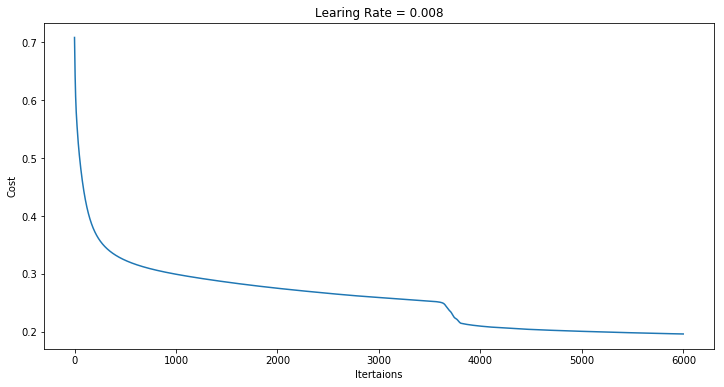

In [25]:
af = 'tanh'
layer_dims = [X.shape[0],5,1]
params = model(X,y,layer_dims,alpha=0.008,lamb=0.001,af=af)

In [26]:
# Predicting  the class for each sample
def predict_binary(X,parameters,af):
    AL,_ = forward_prop(X,parameters,af)
    AL = AL>0.5
          
    return AL 

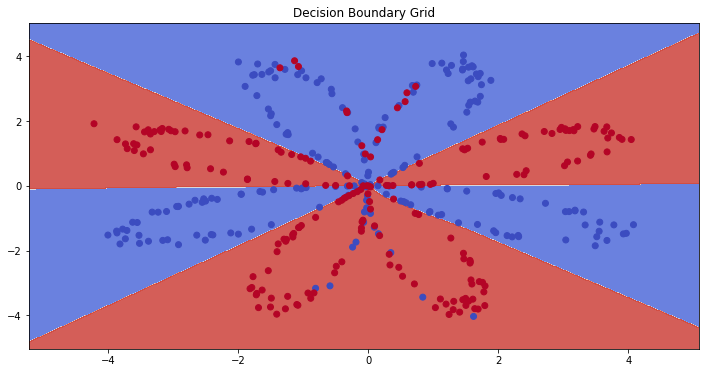

In [27]:
xx,yy,Z = grid(X)
Z = predict_binary(Z,params,af)
plt.contourf(xx, yy, Z.reshape(xx.shape), alpha=0.85, cmap=plt.cm.coolwarm)
plt.scatter(X[0], X[1], c=y.ravel(), cmap=plt.cm.coolwarm)
plt.title("Decision Boundary Grid")
plt.show()

In [28]:
pred_y = predict_binary(X,params,af)
acc = np.mean(pred_y.flatten()==y.flatten())*100
print('Accuracy on the dataset: %s %%' %round(acc,2))

Accuracy on the dataset: 91.0 %


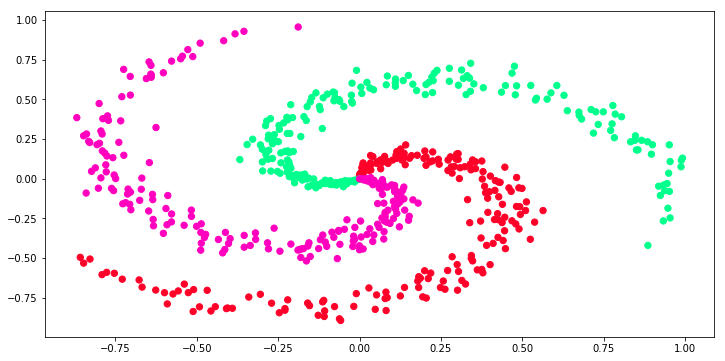

In [29]:
N = 200 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X2 = np.zeros((N*K,D)) # data matrix (each row = single example)
y2 = np.zeros(N*K, dtype='uint8') # class labels
for j in xrange(K):
    ix = range(N*j,N*(j+1))
    r = np.linspace(0.0,1,N) # radius
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
    X2[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y2[ix] = j
# lets visualize the data:
plt.scatter(X2[:, 0], X2[:, 1], c=y2, s=40, cmap=plt.cm.gist_rainbow)
plt.show()

In [30]:
X2 = X2.T
# Converting to one hot matrix
y2_hot = one_hot(y2)

Cost after iteration 0: 1.287020
Your backward propagation works perfectly fine! difference = 8.24024734598348e-09
Cost after iteration 500: 0.182734
Your backward propagation works perfectly fine! difference = 4.77501100495164e-08
Cost after iteration 1000: 0.163165
Your backward propagation works perfectly fine! difference = 8.921300931592313e-08
Cost after iteration 1500: 0.156709
Your backward propagation works perfectly fine! difference = 1.2354371539255518e-07
Cost after iteration 1999: 0.154254


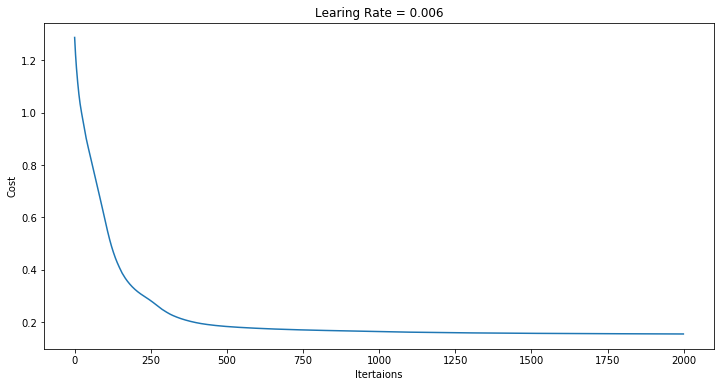

In [31]:
af2 = 'relu'
layer_dims2 = [X2.shape[0],15,5,y2_hot.shape[0]]
params2 = model(X2,y2_hot,layer_dims2,alpha=0.006,lamb=0.8,iteration=2000,af=af2)

In [32]:
def predict_multi(X2,params2,af2):
    AL,_ = forward_prop(X2,params2,af2)
    pred = np.argmax(AL,axis=0)
    return pred

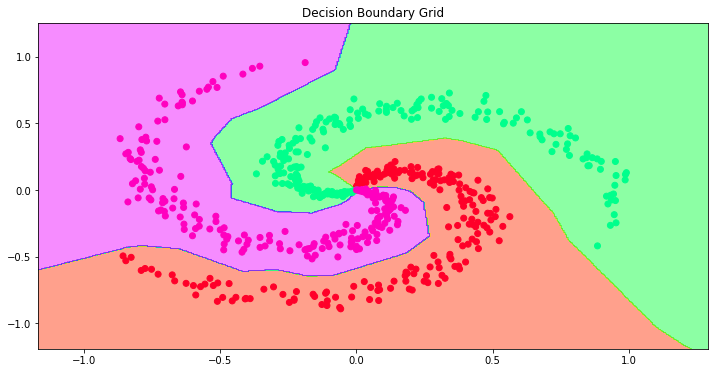

In [33]:
xx,yy,Z = grid(X2,0.3)
Z = predict_multi(Z,params2,af2)
plt.contourf(xx, yy, Z.reshape(xx.shape), alpha=0.45, cmap=plt.cm.gist_rainbow)
plt.scatter(X2[0], X2[1], c=y2, cmap=plt.cm.gist_rainbow)
plt.title("Decision Boundary Grid")
plt.show()

In [34]:
pred_y2 = predict_multi(X2,params2,af2)
acc = np.mean(pred_y2.flatten()==y2.flatten())*100
print('Accuracy on the dataset: %s %%' %round(acc,2))

Accuracy on the dataset: 99.67 %
